In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ml_trading_sim.feature_engineering import remove_outliers_price
from ml_trading_sim.features import get_minmax, feature_optimization_func_give_minmax
from ml_trading_sim.lstm import init_lstm_layers
from ml_trading_sim.init_population import init_swarm_with_range
from ml_trading_sim.fitness import personalfitness_test
from ml_trading_sim.optimizer import run_optimizer

In [2]:
# Config dataset
train_start_set = -15000
train_end_set = -10000
test_start_set = train_end_set
test_end_set = train_end_set+5000
arr = pd.read_csv('inputSignals/sp500.csv')['Close'].iloc[train_start_set:train_end_set]
pct_arr = pd.read_csv('inputSignals/sp500.csv')['Close'].pct_change(1).iloc[train_start_set:train_end_set]+1
observed_data = arr.values 
price_data = np.stack((remove_outliers_price(pct_arr.values)[0],observed_data))
 
# Simulation length
sim_len = arr.shape[0]-1200 
feature_encoding_vars = 0
featvars_count= 0
max1_limit=17777.0
max2_limit=77000.0

if observed_data.shape[0] <= 1000:
    raise Exception("Dataset must be atleast 1000 rows. Current dataset size:",observed_data.shape[0])

In [3]:
# Config LSTM architecture [input_size, hidden_dimensions ,output_size]
nn_architecture = np.array([15,2, 3])
wandb_arr = init_lstm_layers(nn_architecture)

# Init population for optimizer
pop_size = 1
population,var_list = init_swarm_with_range(pop_size,wandb_arr,feature_encoding_vars)

# Create input features from dataset
minim_arr,maxim_arr = get_minmax(wandb_arr,nn_architecture, observed_data,price_data,sim_len,max1_limit, max2_limit,featvars_count)
observed_data =  feature_optimization_func_give_minmax(0, observed_data,sim_len,minim_arr,maxim_arr)

In [7]:
# Tune optimizer
number_of_models = 1 # How many models to train, then vote for best result at end
optimizer_iterations = 7000
mutationrate=0.7 # Beginning rate of mutation
mutationrate_decrease=0.2 # Mutationrate will decrease if no succesful fitness improvements are made
fitness_no_improve_times_limit=550 # Mutationrate will decrease after this amount of failed iterations

# Run optimizer
weights_arr = run_optimizer(optimizer_iterations,fitness_no_improve_times_limit,mutationrate_decrease,mutationrate, number_of_models,pop_size,wandb_arr,feature_encoding_vars,nn_architecture, observed_data,price_data,sim_len,max1_limit, max2_limit,featvars_count)

Model 0
¤¤¤¤¤¤¤¤¤ROUND_NRO: 100   ¤¤¤¤¤¤¤¤¤
Best fitness in memory 52.09469223022461
Mutationrate 0.7
Fitness haven't improved in 91.0  iterations
¤¤¤¤¤¤¤¤¤ROUND_NRO: 200   ¤¤¤¤¤¤¤¤¤
Best fitness in memory 52.09469223022461
Mutationrate 0.7
Fitness haven't improved in 191.0  iterations
¤¤¤¤¤¤¤¤¤ROUND_NRO: 300   ¤¤¤¤¤¤¤¤¤
Best fitness in memory 52.09469223022461
Mutationrate 0.7
Fitness haven't improved in 291.0  iterations
¤¤¤¤¤¤¤¤¤ROUND_NRO: 400   ¤¤¤¤¤¤¤¤¤
Best fitness in memory 52.09469223022461
Mutationrate 0.7
Fitness haven't improved in 391.0  iterations
¤¤¤¤¤¤¤¤¤ROUND_NRO: 500   ¤¤¤¤¤¤¤¤¤
Best fitness in memory 52.09469223022461
Mutationrate 0.7
Fitness haven't improved in 491.0  iterations
¤¤¤¤¤¤¤¤¤ROUND_NRO: 600   ¤¤¤¤¤¤¤¤¤
Best fitness in memory 52.09469223022461
Mutationrate 0.49999999999999994
Fitness haven't improved in 40.0  iterations
¤¤¤¤¤¤¤¤¤ROUND_NRO: 700   ¤¤¤¤¤¤¤¤¤
Best fitness in memory 52.09469223022461
Mutationrate 0.49999999999999994
Fitness haven't improved in 

In [8]:
# Test simulation

# Config test dataset
trainig_len = train_end_set-train_start_set-1200
arr = pd.read_csv('inputSignals/sp500.csv')['Close'].iloc[train_start_set:]
pct_arr = pd.read_csv('inputSignals/sp500.csv')['Close'].pct_change(1).iloc[train_start_set:]+1
sim_len = arr.shape[0]-1200
observed_data = arr.values
price_data = np.stack((pct_arr.values,observed_data))

# Run trading simulation
observed_data =  feature_optimization_func_give_minmax(0, observed_data,sim_len,minim_arr,maxim_arr)
cumulative_product_stack = personalfitness_test(weights_arr,nn_architecture, observed_data,price_data,sim_len,max1_limit, max2_limit,featvars_count, minim_arr, maxim_arr,trainig_len)
print(cumulative_product_stack)

¤¤¤¤¤¤¤¤¤ROUND_NRO: 0   ¤¤¤¤¤¤¤¤¤
reward 1.0068278312683105
¤¤¤¤¤¤¤¤¤ROUND_NRO: 1000   ¤¤¤¤¤¤¤¤¤
reward 1.5286704301834106
¤¤¤¤¤¤¤¤¤ROUND_NRO: 2000   ¤¤¤¤¤¤¤¤¤
reward 2.4595234394073486
¤¤¤¤¤¤¤¤¤ROUND_NRO: 3000   ¤¤¤¤¤¤¤¤¤
reward 3.6390273571014404
¤¤¤¤¤¤¤¤¤ROUND_NRO: 0   ¤¤¤¤¤¤¤¤¤
reward 0.9890097975730896
¤¤¤¤¤¤¤¤¤ROUND_NRO: 1000   ¤¤¤¤¤¤¤¤¤
reward 1.1355464458465576
¤¤¤¤¤¤¤¤¤ROUND_NRO: 2000   ¤¤¤¤¤¤¤¤¤
reward 2.1621925830841064
¤¤¤¤¤¤¤¤¤ROUND_NRO: 3000   ¤¤¤¤¤¤¤¤¤
reward 2.964775323867798
¤¤¤¤¤¤¤¤¤ROUND_NRO: 4000   ¤¤¤¤¤¤¤¤¤
reward 4.413657188415527
¤¤¤¤¤¤¤¤¤ROUND_NRO: 5000   ¤¤¤¤¤¤¤¤¤
reward 9.816431999206543
¤¤¤¤¤¤¤¤¤ROUND_NRO: 6000   ¤¤¤¤¤¤¤¤¤
reward 12.100737571716309
¤¤¤¤¤¤¤¤¤ROUND_NRO: 7000   ¤¤¤¤¤¤¤¤¤
reward 18.842741012573242
¤¤¤¤¤¤¤¤¤ROUND_NRO: 8000   ¤¤¤¤¤¤¤¤¤
reward 35.47762680053711
¤¤¤¤¤¤¤¤¤ROUND_NRO: 9000   ¤¤¤¤¤¤¤¤¤
reward 59.75980758666992
[0.9890098  0.97922558 0.97640127 ... 1.0044796  1.00070259 1.00856739]


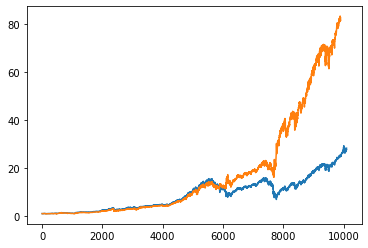

In [9]:
# Orange line is AI's profit fluctuation while trading:  
    # Cumulative_product_stack gives result as cumulative product of profit

# Blue is baseline strategy, no trades, just price data:
    # pct_arr is cumulative product of stock price. It follows same route as stock price normally, just scaled to begin from 1.0
    
# If orange line is greater than blue, then AI strategy was better
plt.plot(np.cumprod(pct_arr.values[trainig_len+1100:]))
plt.plot(cumulative_product_stack[:-4000]) 